# Solving 2D heat equation using finite difference method

In this notebook we will use the example (based on https://levelup.gitconnected.com/solving-2d-heat-equation-numerically-using-python-3334004aa01a) of a simple heat equation to illustrate the solution of a finite difference method. Recall that a 2D heat equation is given by the following partial differential equation (PDE):

$$
    \frac{\partial u}{\partial t} = \alpha \left(\frac{\partial ^ 2 u} {\partial x^2} + \frac{\partial ^ 2 u} {\partial y^2}\right)
$$

In order to solve the above PDE, we will  “discretize” the spatial domain $x$,$y$ and the time interval $t$. 

<img src="grid.png" width="500" height="300">

We can use the following dicretization for the spatial and time dimensions.

$$x_i = i \Delta x $$

$$y_j = j \Delta y $$

$$t_n = n \Delta t $$

As we can see, $i$, $j$, and $n$ are the steps for each difference for $x$, $y$, and $t$ respectively. What we want is the solution $u$, which is

$$u(x,y,t) = u_{i,j}^{n}$$

We can write the heat equation above using finite-difference method 

$$ \frac{u_{i,j}^{n+1}- u_{i,j}^{n}}{\Delta t} -\alpha \left(\frac{u_{i+1,j}^{n} - 2 u_{i,j}^{n} + u_{i-1,j}^{n}}{\Delta x^2} + \frac{u_{i,j+1}^{n} - 2 u_{i,j}^{n} + u_{i,j-1}^{n}}{\Delta y^2}\right) = 0$$

which can be rewritten as 

$$ u_{i,j}^{n+1} = \gamma (u_{i+1,j}^{n} + u_{i-1,j}^{n} + u_{i,j+1}^{n} + u_{i,j-1}^{n} - 4 u_{i,j}^{n}) + u_{i,j}^{n} $$

where $$\gamma = \alpha\frac{\Delta t}{\Delta x^2}.$$ 

We use explicit method to get the solution for the heat equation, so it will be numerically stable whenever $$ \Delta t \leq \frac{\Delta x^2}{4 \alpha}.$$
We can also the picture below to intuitively understand the above equation.

<img src="eqn_grid.png" width="250" height="150">

For an implementation, let’s suppose a thin square plate with the side of 50 unit length. The temperature everywhere inside the plate is originally 0 degree (at $t =0$), except at one edge which is at 100 degrees.

<img src="bdry.png" width="400" height="250">

# Implementing the Finite Difference method in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [2]:
# We use numpy (for array related operations) and matplotlib (for plotting) 
# because they will help us a lot

def initialize_grid(max_iter_time, plate_length, boundary_value):
    
    # Initialize solution: the grid of u(k, i, j)
    u = np.empty((max_iter_time, plate_length, plate_length))

    # Initial condition everywhere inside the grid
    u_initial = 0.0

    # Boundary conditions (fixed temperature)
    u_top = boundary_value
    u_left = 0.0
    u_bottom = 0.0
    u_right = 0.0

    # Set the initial condition
    u.fill(u_initial)

    # Set the boundary conditions
    u[:, (plate_length-1):, :] = u_top
    u[:, :, :1] = u_left
    u[:, :1, 1:] = u_bottom
    u[:, :, (plate_length-1):] = u_right


    print("\nInitial 2-D grid in spatial dimension for time snapshot t=0 is listed below\n")
    print(u[0,:,:])
    return u

In [3]:

#Initialize plate length and max time iterations

plate_length = 50
max_iter_time = 500
boundary_value = 100

initial_grid = initialize_grid(max_iter_time, plate_length, boundary_value)

alpha = 2.0
delta_x = 1

# Calculated params (\Delta t should obey the FTCS condition for stability)
delta_t = (delta_x ** 2)/(4 * alpha)
print("\nUsing a timestep size of \Delta t = ", delta_t)
gamma = (alpha * delta_t) / (delta_x ** 2)


Initial 2-D grid in spatial dimension for time snapshot t=0 is listed below

[[   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 ..., 
 [   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 [   0.  100.  100. ...,  100.  100.    0.]]

Using a timestep size of \Delta t =  0.125


In [4]:
# Calculate u iteratively on the grid based on the equation derived above

def calculate(u):
    for k in range(0, max_iter_time-1, 1):
        for i in range(1, plate_length-1, delta_x):
            for j in range(1, plate_length-1, delta_x):
                u[k + 1, i, j] = gamma * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j]) + u[k][i][j]
  
    return u

In [6]:
def plotheatmap(u_k, k):
  # Clear the current plot figure
    plt.clf()
    plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")
  
    # This is to plot u_k (u at time-step k)
    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=100)
    plt.colorbar()
    return plt

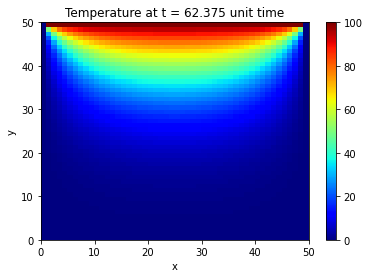

In [82]:
# Calculate final grid 
final_grid = calculate(initial_grid)

# Plot the animation for the solution in time steps

def animate(k):
    plotheatmap(final_grid[k], k)


anim = animation.FuncAnimation(plt.figure(), animate, interval=1,frames=max_iter_time, repeat=False)
anim.save("heat_equation_solution.gif")

# Unstable solution example

Suppose we violate the condition for stability for the explicit scheme $$\Delta t \leq \frac{\Delta x^2}{4 \alpha}$$ by setting $\Delta t > \frac{\Delta x^2}{4 \alpha}$.

In [78]:

#Initialize plate length and max time iterations

plate_length = 50
max_iter_time = 50
boundary_value = 100

initial_unstable_grid = initialize_grid(max_iter_time, plate_length, boundary_value)

alpha = 2.0
delta_x = 1

# Calculated params (\Delta t violates the FTCS condition for stability)

delta_t = 1.5 * (delta_x ** 2)/(4 * alpha)
print("\nUsing a timestep size of \Delta t = ", delta_t)
gamma = (alpha * delta_t) / (delta_x ** 2)


Initial 2-D grid in spatial dimension for time snapshot t=0 is listed below

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0. 100. 100. ... 100. 100.   0.]]

Using a timestep size of \Delta t =  0.1875


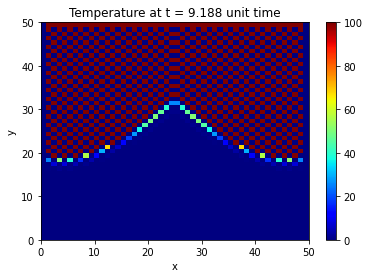

In [79]:
# Calculate final grid
final_unstable_grid = calculate(initial_unstable_grid)

# Plot the animation for the solution in time steps

def animate(k):
    plotheatmap(final_unstable_grid[k], k)


anim = animation.FuncAnimation(plt.figure(), animate, interval=1,frames=max_iter_time, repeat=False)
anim.save("heat_equation_solution_unstable.gif")